In [32]:
import tensorflow as tf

In [33]:
# import required packages
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
import numpy as np

In [34]:
dataset_url = '/Users/saurmoha/Desktop/winequality-white.csv'
dataset = pd.read_csv(dataset_url, sep=';')


In [35]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [36]:
# extracting features and labels
x = dataset.drop('quality' , axis = 1)
y = dataset['quality']

In [37]:
# creating training, validation and testing datasets
from sklearn.model_selection import train_test_split
x_train_1 , x_test , y_train_1 , y_test = train_test_split(x , y , test_size = 0.15 , random_state = 0)
x_train , x_val , y_train , y_val = train_test_split(x_train_1 , y_train_1 , test_size = 0.05 , random_state = 0)

In [38]:
# scaling data
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
# Here sc_x is used to understand the structure of training dataset , 
# applying formulas and then transforming the training dataset.
x_train_new = sc_x.fit_transform(x_train)
# Here we don't need to fit it again.
x_test_new = sc_x.transform(x_test)
x_val_new = sc_x.transform(x_val)

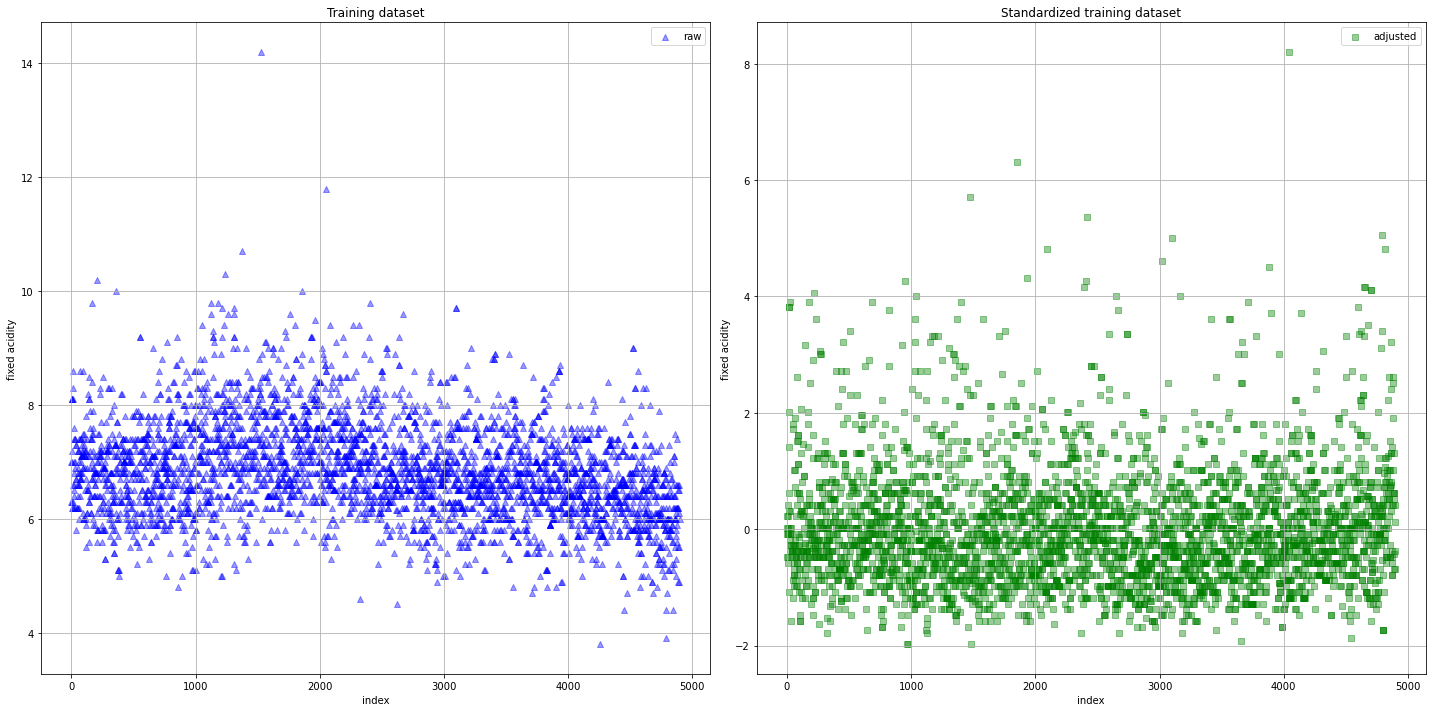

In [39]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))

ax1.scatter(x_train.index,
                x_train['fixed acidity'],
                color= 'blue',
                label='raw',
                alpha=0.4,
                marker='^'
                )

ax2.scatter(x_train.index,
                x_train_new[: , 1],
                color = 'green',
                label='adjusted',
                alpha=0.4,
                marker='s'
                )

ax1.set_title('Training dataset')
ax2.set_title('Standardized training dataset')

for ax in (ax1, ax2):
    ax.set_xlabel('index')
    ax.set_ylabel('fixed acidity')
    ax.legend(loc='upper right')
    ax.grid()

plt.tight_layout()

plt.show()

In [40]:
model = tf.keras.Sequential([
                               tf.keras.layers.Dense(128 , activation = 'relu' , 
                                                     input_shape = (11, )),
                               tf.keras.layers.Dense(128 , activation = 'relu'),
                               tf.keras.layers.Dense(128 , activation = 'relu'),
                               tf.keras.layers.Dense(128 , activation = 'relu'),
                               tf.keras.layers.Dense(1)
])

model.compile(loss = 'mse' , optimizer= 'adam' , metrics = ['mae'])


history_large = model.fit(x_train_new , y_train , batch_size=32, epochs = 30,verbose = 1 , validation_data= (x_val_new , y_val))

Epoch 1/30
124/124 [==============================] - 1s 2ms/step - loss: 10.9943 - mae: 2.5684 - val_loss: 1.3845 - val_mae: 0.9779
Epoch 2/30
124/124 [==============================] - 0s 1ms/step - loss: 1.3889 - mae: 0.9120 - val_loss: 0.6496 - val_mae: 0.6473
Epoch 3/30
124/124 [==============================] - 0s 1ms/step - loss: 0.6960 - mae: 0.6597 - val_loss: 0.6471 - val_mae: 0.6222
Epoch 4/30
124/124 [==============================] - 0s 1ms/step - loss: 0.5449 - mae: 0.5708 - val_loss: 0.5166 - val_mae: 0.5449
Epoch 5/30
124/124 [==============================] - 0s 1ms/step - loss: 0.4777 - mae: 0.5388 - val_loss: 0.5504 - val_mae: 0.5680
Epoch 6/30
124/124 [==============================] - 0s 1ms/step - loss: 0.4879 - mae: 0.5486 - val_loss: 0.5153 - val_mae: 0.5526
Epoch 7/30
124/124 [==============================] - 0s 1ms/step - loss: 0.4685 - mae: 0.5356 - val_loss: 0.6641 - val_mae: 0.6457
Epoch 8/30
124/124 [==============================] - 0s 1ms/step - loss: 0

In [41]:
l_test_loss , l_test_mae = model.evaluate(x_test_new , y_test , batch_size = 32 , verbose = 1)
print("test_loss : {}".format(l_test_loss))
print("test_mae : {}".format(l_test_mae))

23/23 [==============================] - 0s 768us/step - loss: 0.5514 - mae: 0.5597
test_loss : 0.5513978600502014
test_mae : 0.5597481727600098


In [42]:
y_model = model.predict(sc_x.transform(np.array([[6.0 , 0.28 , 0.22 , 12.15 , 0.048 , 42.0 , 163.0 , 0.99570 , 3.20 , 0.46 , 10.1]])))
print ("Wine quality on unseen data (model): ", y_model[0][0])

Wine quality on unseen data (model):  5.1041064


In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               1536      
_________________________________________________________________
dense_11 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_12 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 129       
Total params: 51,201
Trainable params: 51,201
Non-trainable params: 0
_________________________________________________________________
